<a href="https://colab.research.google.com/github/PragyaShukla2580/Loan/blob/main/LoanApprovalFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Loan Approval System with model Explainability**

#Import required packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Data

For this practice problem, we have been given two CSV files: train and test.

Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.

Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.

#Read Train and Test Data

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

#**Copy of original data**

Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [ ]:
train_original = train.copy()
test_original = test.copy()

#**Understanding the Data**
In this section, we will look at the structure of the train and test datasets. Firstly, we will check the features present in our data and then we will look at their data types.

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset. Let’s also have a look at the columns of test dataset.

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the test dataset as the train dataset except the Loan_Status. We will predict the Loan_Status using the model that we will build using the train data.

#**Print the data types**

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see there are three format of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.

int64: It represents the integer variables. ApplicantIncome is of this format.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

#**Shape of the dataset**

In [ ]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

#**Univariate Analysis**
In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually.

For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.

For numerical features, probability density plots can be used to look at the distribution of the variable.

#**Target Variable**
We will first look at the target variable, i.e., Loan_Status.

As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

In [ ]:
#train["Loan_Status"].size
train["Loan_Status"].count()

614

Size of our target variable is : 614

In [ ]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Among 614 Loan_Status : Accepted : 422 Rejected : 192



In [ ]:
# Normalize can be set to True to print proportions instead of number 
train["Loan_Status"].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

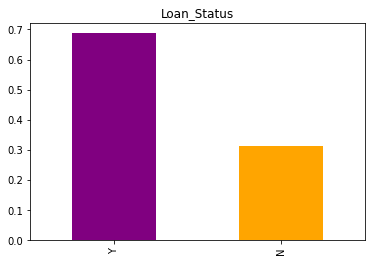

In [ ]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status', color=["Purple","Orange"])

The loan of 422(around 69%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

#**Independent Variable (Categorical)**
#**Analysis on "Gender" variable :**

In [ ]:
train["Gender"].count()

601

Size of our "Gender" variable is : 614

In [ ]:
train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Among 601 person: Male : 489 Female : 112

In [ ]:
train['Gender'].value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

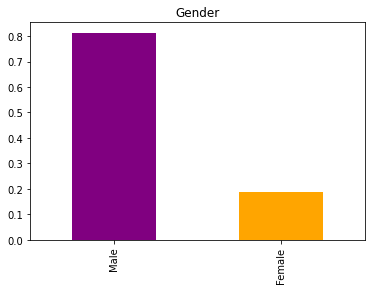

In [ ]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender',color=["purple","orange"])

In our train dataset the "Gender" variable contain Male : 81% Female: 19%

#**Analysis on "Married" variable :**


In [ ]:
train["Married"].count()

611

Size of our "Married" variable is : 611

In [ ]:
train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

Total number of people : 611

Married : 398

Unmarried : 213

In [ ]:
train['Married'].value_counts(normalize=True)*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

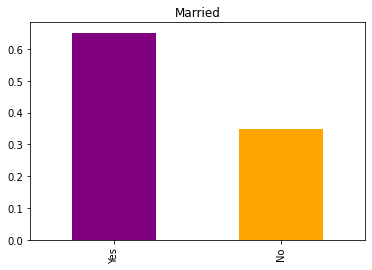

In [ ]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color=["purple","orange"])

From the Grapch we see that :

Number of married people : 65%

Number of unmarried people : 35%

#**Analysis on "Self_Employed" variable :**

In [ ]:
train["Self_Employed"].count()

582

Size of our "Self_Employed" variable is : 582

In [ ]:
train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Total number of people : 582

Self_Employed : 82

Not_Self_Employed : 500

In [ ]:
train['Self_Employed'].value_counts(normalize=True)*100


No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

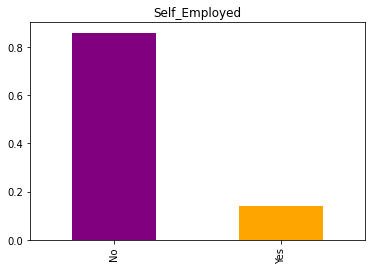

In [ ]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed',color=["Purple","Orange"])

Among 582 people only 14% are Self_Employed and rest of the 86% are Not_Self_Employed

#**Analysis on "Credit_History" variable :**

In [ ]:
train["Credit_History"].count()

564

Size of our "Credit_History" variable is : 564

In [ ]:
train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Total number of debts : 564

Repaid Debts : 475

Not Repaid Debts : 89

In [ ]:
train['Credit_History'].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

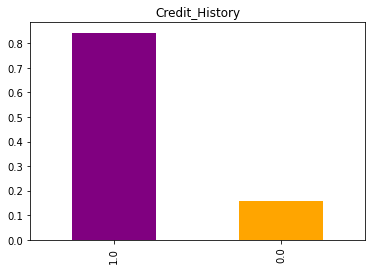

In [ ]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History',color=["Purple","Orange"])

Around 84% applicants have repaid their debts.

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

#**Independent Variable (Ordinal)**
Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

#**Analysis on "Dependents" variable :**

In [ ]:
train['Dependents'].count()

599

Size of our "Dependents" variable is : 599

In [ ]:
train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Number of 0 Dependent : 345

Number of 1 Dependent : 102

Number of 2 Dependesnt : 101

Number of 3+ Dependent : 51

In [ ]:
train['Dependents'].value_counts(normalize=True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

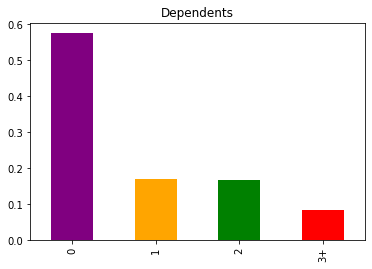

In [ ]:
train['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents",color=["Purple","Orange","Green","Red"])

58% people have 0 dependent

17% people have 1 dependent

17% people have 2 dependent

8% people have 3+ dependent

#**Analysis on "Education" variable :**

In [ ]:
train["Education"].count()

614

Size of Education variable : 614

In [ ]:
train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

People who are Graduated : 480

People who are not Graduated : 134

In [ ]:
train["Education"].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

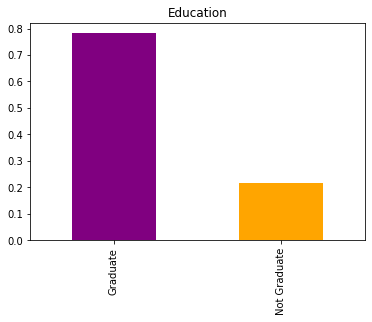

In [ ]:
train["Education"].value_counts(normalize=True).plot.bar(title = "Education",color=["Purple","Orange"])

Total number of People : 614

78% are Graduated and 22% are not Graduated

#**Analysis on "Property_Area" variable :**

In [ ]:
train["Property_Area"].count()

614

Size of "Property_Area" variable : 614

In [ ]:
train["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Total number of People : 614

People from Semiurban area : 233

People from Urban area : 202

People from Rural area : 179

In [ ]:
train["Property_Area"].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

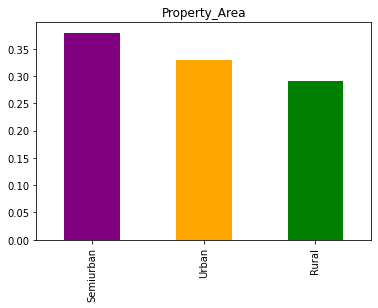

In [ ]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area",color=["Purple","Orange","Green"])

38% people from Semiurban area

33% people from Urban area

29% people from Rural area

#**Independent Variable (Numerical)**
Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

#**"ApplicantIncome" distribution :**


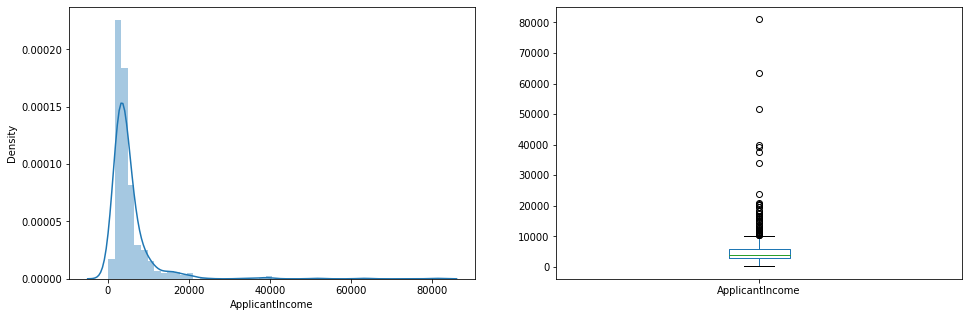

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"]);

plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

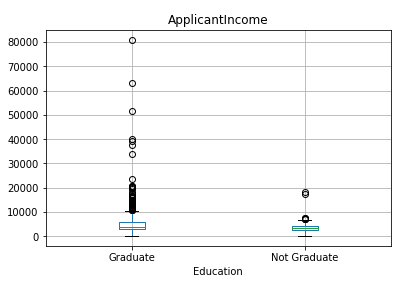

In [ ]:
train.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

#**Let’s look at the "CoapplicantIncome" distribution:**

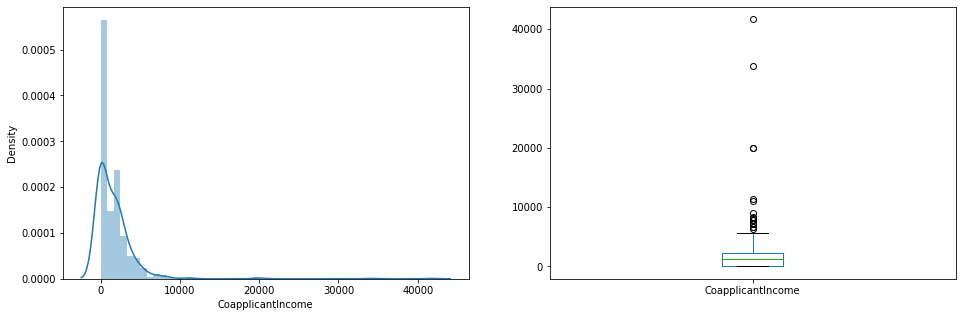

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"]);

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

#**Let’s look at the distribution of "LoanAmount" variable :**

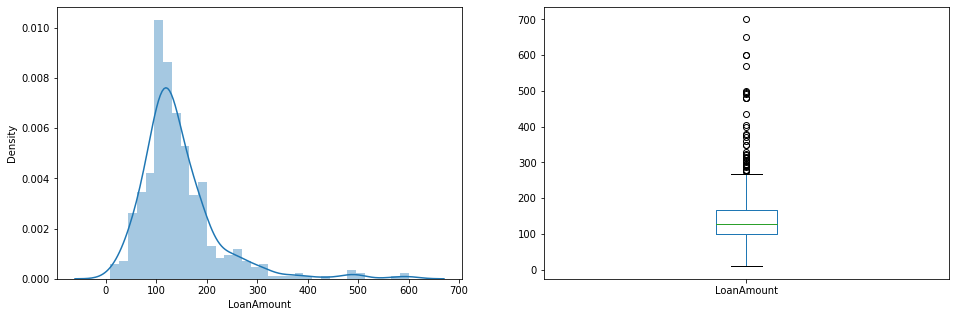

In [ ]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

#**distribution of "LoanAmountTerm" variable :**

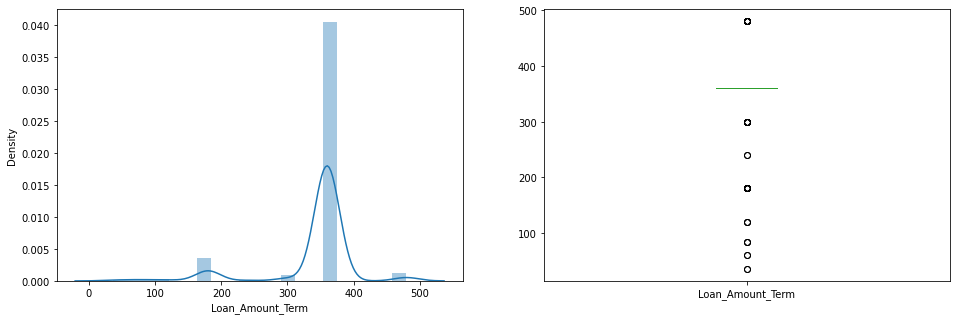

In [ ]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()


We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

#**Bivariate Analysis**
Lets recall some of the hypotheses that we generated earlier:

i)Applicants with high income should have more chances of loan approval.

ii)Applicants who have repaid their previous debts should have higher chances of loan approval.

iii)Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

iv)Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Lets try to test the above mentioned hypotheses using bivariate analysis.

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

#**Categorical Independent Variable vs Target Variable**
First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

#**Relation between "Loan_Status" and "Gender"**

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


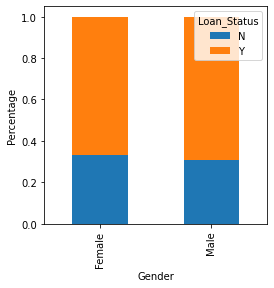

In [ ]:
print(pd.crosstab(train["Gender"],train["Loan_Status"]))
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Number of Female whose Loan was approved : 75

Number of Male whose Loan was approved : 339

Number of Female whose Loan was not approved : 37

Number of Male whose Loan was not approved : 150

Proportion of Male applicants is higher for the approved loans.

#**Relation between "Loan_Status" and "Married"**

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


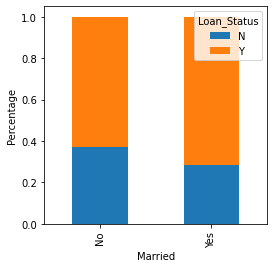

In [ ]:
print(pd.crosstab(train["Married"],train["Loan_Status"]))
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Number of married people whose Loan was approved : 285

Number of married people whose Loan was not approved : 113

Number of unmarried people whose Loan was approved : 134

Number of unmarried people whose Loan was not approved : 79

Proportion of Married applicants is higher for the approved loans.

#**Relation between "Loan_Status" and "Dependents"**

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


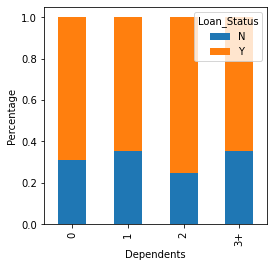

In [ ]:
print(pd.crosstab(train['Dependents'],train["Loan_Status"]))
Dependents = pd.crosstab(train['Dependents'],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Number of dependents on the loan applicant : 0 and Loan was approved : 238

Number of dependents on the loan applicant : 0 and Loan was not approved : 107

Number of dependents on the loan applicant : 1 and Loan was approved : 66

Number of dependents on the loan applicant : 1 and Loan was not approved : 36

Number of dependents on the loan applicant : 2 and Loan was approved : 76

Number of dependents on the loan applicant : 2 and Loan was not approved : 25

Number of dependents on the loan applicant : 3+ and Loan was approved : 33

Number of dependents on the loan applicant : 3+ and Loan was not approved : 18

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

#**Relation between "Loan_Status" and "Education"**

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


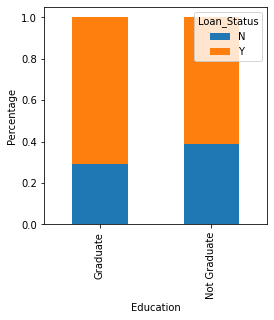

In [ ]:
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Number of people who are Graduate and Loan was approved : 340

Number of people who are Graduate and Loan was no approved : 140

Number of people who are Not Graduate and Loan was approved : 82

Number of people who are Not Graduate and Loan was not approved : 52

Proportion of Graduate applicants is higher for the approved loans.

#**Relation between "Loan_Status" and "Self_Employed"**

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


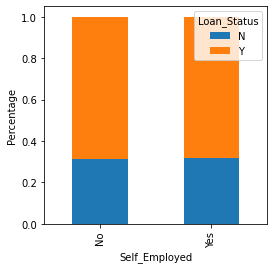

In [ ]:
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))
SelfEmployed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

People who are Self_Employed and Loan was approved : 56

People who are Self_Employed and Loan was not approved : 26

People who are not Self_Employed and Loan was approved : 343

People who are not Self_Employed and Loan was not approved : 157

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

#**Relation between "Loan_Status" and "Credit_History"**

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


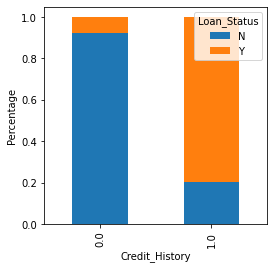

In [ ]:
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))
CreditHistory = pd.crosstab(train["Credit_History"],train["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

People with credit history as 1 and loan was approved : 378

People with credit history as 1 and loan was not approved : 97

People with credit history as 0 and loan was approved : 7

People with credit history as 0 and loan was not approved : 82

It seems people with credit history as 1 are more likely to get their loans approved.

#**Relation between "Loan_Status" and "Property_Area"**

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


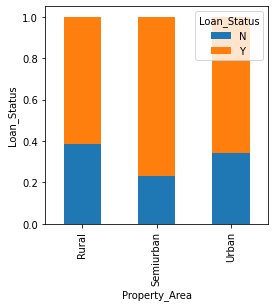

In [ ]:
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))
PropertyArea = pd.crosstab(train["Property_Area"],train["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

People who are from Rural area and loan was approved : 110

People who are from Rural area and loan was not approved : 69

People who are from Semiurban area and loan was approved : 179

People who are from Semiurban area and loan was not approved : 54

People who are from Urban area and loan was approved : 133

People who are from Semiurban area and loan was not approved : 69

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

#**Numerical Independent Variable vs Target Variable**
#**Relation between "Loan_Status" and "Income"**
We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

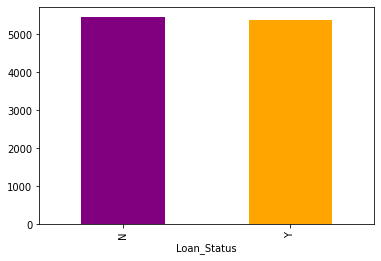

In [ ]:
train.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar(color=["Purple","Orange"])

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


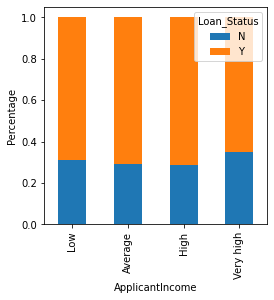

In [ ]:
print(pd.crosstab(train["Income_bin"],train["Loan_Status"]))
Income_bin = pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar way.

In [ ]:
bins=[0,1000,3000,42000]
group =['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(df["CoapplicantIncome"],bins,labels=group)

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   15
Average                46  123
High                   24   53


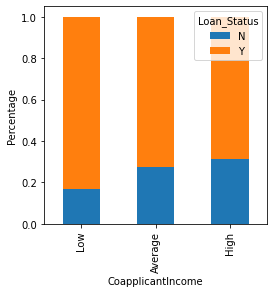

In [ ]:
print(pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval

In [ ]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [ ]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train["TotalIncome_bin"]=pd.cut(train["TotalIncome"],bins,labels=group)

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


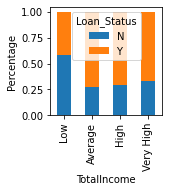

In [ ]:
print(pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"]))
TotalIncome = pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()


Whose TotalIncome was Low and loan was approved : 10

Whose TotalIncome was Low and loan was not approved : 14

Whose TotalIncome was Aerage and loan was approved : 87

Whose TotalIncome was Average and loan was not approved : 32

Whose TotalIncome was High and loan was approved : 159

Whose TotalIncome was High and loan was not approved : 65

Whose TotalIncome was Very High and loan was approved : 166

Whose TotalIncome was Very High and loan was not approed : 81

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

#**Relation between "Loan_Status" and "Loan Amount"**

In [ ]:
bins = [0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

Loan_Status      N    Y
LoanAmount_bin         
Low             38   86
Average         83  207
High            27   39


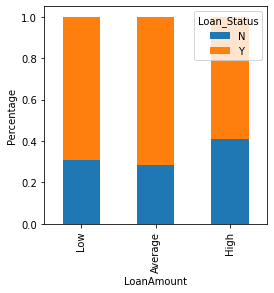

In [ ]:
print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

Whose Loan Amount was low and Loan was approved : 86

Whose Loan Amount was low and Loan was not approved : 38

Whose Loan Amount was Average and Loan was approved : 207

Whose Loan Amount was Average and Loan was not approved : 83

Whose Loan Amount was High and Loan was approved : 39

Whose Loan Amount was High and Loan was not approved : 27

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

#**Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable**

In [ ]:
train=train.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)

In [ ]:
#train['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
#test['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

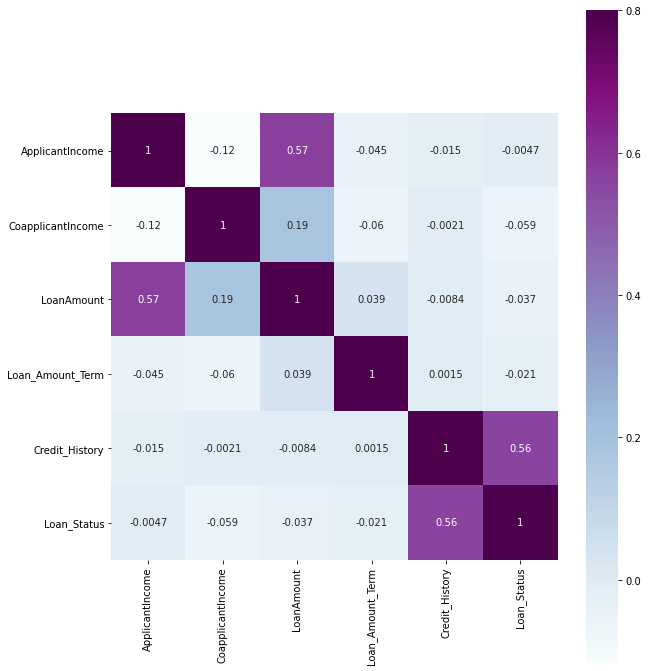

In [ ]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).
#**Missing Value and Outlier Treatment**
After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

#**Missing value imputation**
Let’s list out feature-wise count of missing values.

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median

For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features

In [ ]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [ ]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [ ]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [ ]:
train["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values.

We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [ ]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the train dataset.

Let’s fill all the missing values in the test dataset too with the same approach

In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

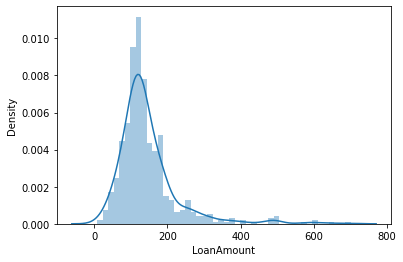

In [ ]:
sns.distplot(train["LoanAmount"]);

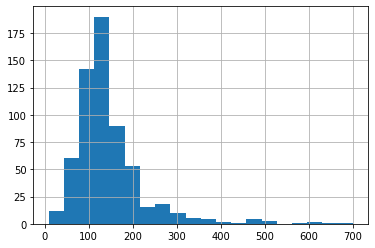

In [ ]:
train['LoanAmount'].hist(bins=20)

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness.

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.

So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation.

We will do the similar changes to the test file simultaneously.

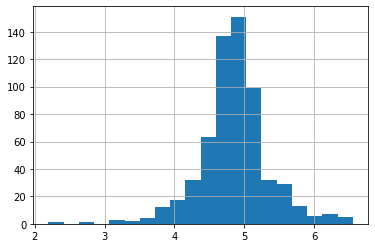

In [ ]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

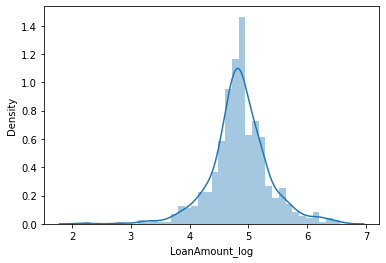

In [ ]:
sns.distplot(train["LoanAmount_log"])

Let's have a look in test set [LoanAmount]

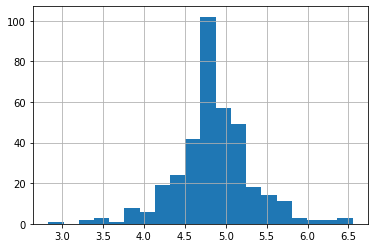

In [ ]:
test["LoanAmount_log"]=np.log(train["LoanAmount"])
test['LoanAmount_log'].hist(bins=20)

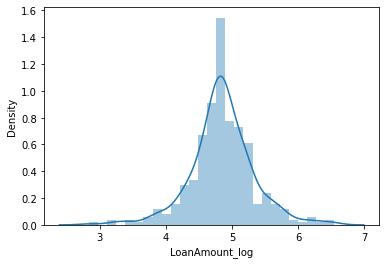

In [ ]:
sns.distplot(test["LoanAmount_log"])

#**Feature Engineering**
Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [ ]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

Just have a look of train dataset "TotalIncome"

In [ ]:
train[["TotalIncome"]].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


In [ ]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

Just have a look of test dataset "TotalIncome"

In [ ]:
test[["TotalIncome"]].head()

,TotalIncome
0,5720
1,4576
2,6800
3,4886
4,3276


Let’s check the distribution of train dataset Total Income.

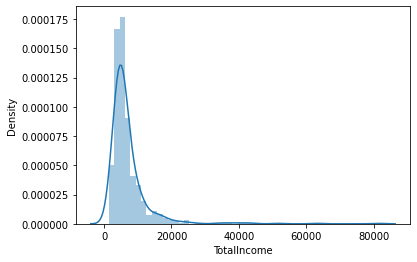

In [ ]:
sns.distplot(train["TotalIncome"])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

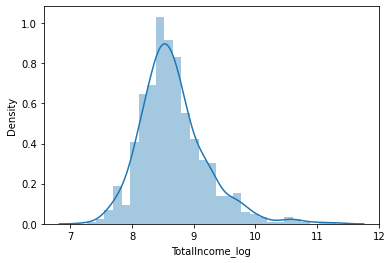

In [ ]:
train["TotalIncome_log"]=np.log(train["TotalIncome"])
sns.distplot(train["TotalIncome_log"])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Let’s check the distribution of test dataset Total Income.

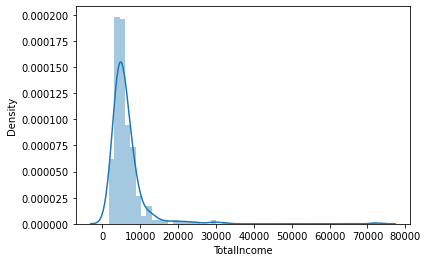

In [ ]:
sns.distplot(test["TotalIncome"])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

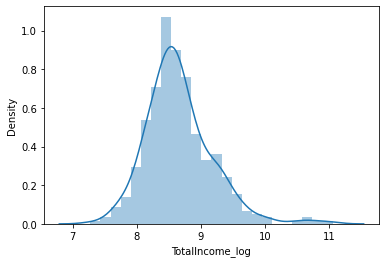

In [ ]:
test["TotalIncome_log"] = np.log(train["TotalIncome"])
sns.distplot(test["TotalIncome_log"])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Now create the EMI feature.

In [ ]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

Have a look of train dataset "EMI"

In [ ]:
train[["EMI"]].head()

,EMI
0,0.355556
1,0.355556
2,0.183333
3,0.333333
4,0.391667


Again have a look of test dataset "EMI"

In [ ]:
test[["EMI"]].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
3,0.277778
4,0.216667


Let’s check the distribution of EMI variable.

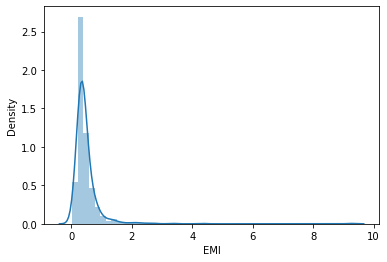

In [ ]:
sns.distplot(train["EMI"])

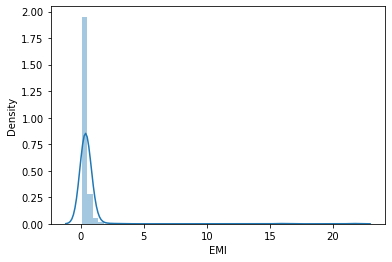

In [ ]:
sns.distplot(test["EMI"])

Let's create Balance Income feature now and check its distribution.

In [ ]:
#test.head()
train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000 # To make the units equal we multiply with 1000
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]*1000

Have a look of train dataset "Balance Income"

In [ ]:
train[["Balance_Income"]].head()

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


Have a look of test dataset "Balance Income"

In [ ]:
test[["Balance_Income"]].head()

,Balance_Income
0,5414.444444
1,4226.000000
2,6222.222222
3,4608.222222
4,3059.333333


Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [ ]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333


In [ ]:
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,5720,8.674026,0.305556,5414.444444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4226.000000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6222.222222
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,4886,8.505323,0.277778,4608.222222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,3276,8.699515,0.216667,3059.333333


Let's drop the "Loan_ID" variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [ ]:
train = train.drop(columns=['Loan_ID'])
train=train.drop(columns=['TotalIncome'])
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,8.006368,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,8.505323,0.333333,4607.666667
4,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,8.699515,0.391667,5608.333333


In [ ]:
test = test.drop(columns=['Loan_ID'])
test=test.drop(columns=['TotalIncome'])
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,8.674026,0.305556,5414.444444
1,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,8.714568,0.350000,4226.000000
2,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,8.006368,0.577778,6222.222222
3,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,8.505323,0.277778,4608.222222
4,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,8.699515,0.216667,3059.333333


Lets encode categorical features.

In [ ]:
#### Encoding categrical Features: ##########
train = pd.get_dummies(train,columns=["Gender"])
train = pd.get_dummies(train,columns=["Married"])
train = pd.get_dummies(train,columns=["Dependents"])
train = pd.get_dummies(train,columns=["Education"])
train = pd.get_dummies(train,columns=["Self_Employed"])
train = pd.get_dummies(train,columns=["Credit_History"])
train = pd.get_dummies(train,columns=["Property_Area"])
train.head()

,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,4.852030,8.674026,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1
1,0,4.852030,8.714568,0.355556,5735.444444,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0
2,1,4.189655,8.006368,0.183333,2816.666667,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,1,4.787492,8.505323,0.333333,4607.666667,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1
4,1,4.948760,8.699515,0.391667,5608.333333,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1


In [ ]:
test = pd.get_dummies(test,columns=["Gender"])
test = pd.get_dummies(test,columns=["Married"])
test = pd.get_dummies(test,columns=["Dependents"])
test = pd.get_dummies(test,columns=["Education"])
test = pd.get_dummies(test,columns=["Self_Employed"])
test = pd.get_dummies(test,columns=["Credit_History"])
test = pd.get_dummies(test,columns=["Property_Area"])
test.head()

,LoanAmount_log,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4.852030,8.674026,0.305556,5414.444444,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
1,4.852030,8.714568,0.350000,4226.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1
2,4.189655,8.006368,0.577778,6222.222222,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1
3,4.787492,8.505323,0.277778,4608.222222,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1
4,4.948760,8.699515,0.216667,3059.333333,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1


Lets normalize data.

In [ ]:
train["LoanAmount_log"]=((train["LoanAmount_log"])/train["LoanAmount_log"].max())
train["TotalIncome_log"]=((train["TotalIncome_log"])/train["TotalIncome_log"].max())
train["Balance_Income"]=((train["Balance_Income"])/train["Balance_Income"].max())
train.head()

,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0.740646,0.767463,0.355556,0.068668,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1
1,0,0.740646,0.771050,0.355556,0.071693,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0
2,1,0.639536,0.708390,0.183333,0.035208,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,1,0.730794,0.752537,0.333333,0.057596,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1
4,1,0.755411,0.769718,0.391667,0.070104,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1


In [ ]:
test["LoanAmount_log"]=((test["LoanAmount_log"])/test["LoanAmount_log"].max())
test["TotalIncome_log"]=((test["TotalIncome_log"])/test["TotalIncome_log"].max())
test["Balance_Income"]=((test["Balance_Income"])/test["Balance_Income"].max())
test.head()

,LoanAmount_log,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.740646,0.784538,0.305556,0.075696,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
1,0.740646,0.788205,0.350000,0.059081,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1
2,0.639536,0.724150,0.577778,0.086989,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1
3,0.730794,0.769279,0.277778,0.064425,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1
4,0.755411,0.786843,0.216667,0.042771,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1


We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

dropping the target variable "Loan_Status"

In [ ]:
X=train.drop("Loan_Status",1)

In [ ]:
X.head()

,LoanAmount_log,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.740646,0.767463,0.355556,0.068668,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1
1,0.740646,0.771050,0.355556,0.071693,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0
2,0.639536,0.708390,0.183333,0.035208,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,0.730794,0.752537,0.333333,0.057596,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1
4,0.755411,0.769718,0.391667,0.070104,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1


Save the target variable "Loan_Status" in another dataset



In [ ]:
y=train[["Loan_Status"]]

In [ ]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts:train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

The dataset has been divided into training and validation part.

70% data will use for train the model and rest of the 30% data will use for checking validation of the model.

#**Model : 1**

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train,y_train)
y_pred = tree_clf.predict(x_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6567665884359257
Validation Mean Accuracy:  0.6970177838577292


**Overfitting Problem**

We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.

**First let's try tuning 'Max_Depth' of tree.**

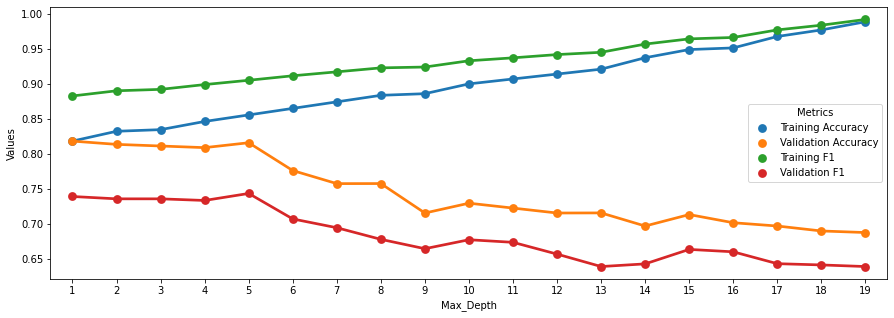

In [ ]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(x_train,y_train)
    y_training_pred = tree_clf.predict(x_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above graph, we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score Optimum Test Accuracy ~ 0.79; Optimum F1 Score: ~0.7

**Visulazing Decision Tree with Max Depth = 3**

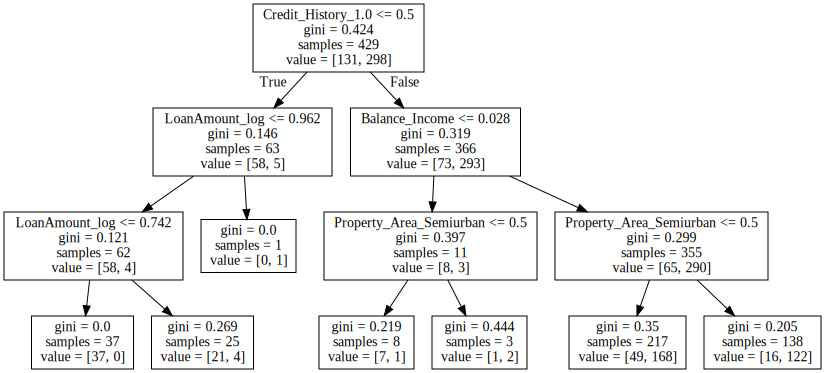

In [ ]:
import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(x_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

From above tree, we could see that some of the leafs have less than 10 samples hence our classifier might overfit. We can sweep hyper-parameter 'min_samples_leaf' to further improve test accuracy by keeping max_depth to 3.

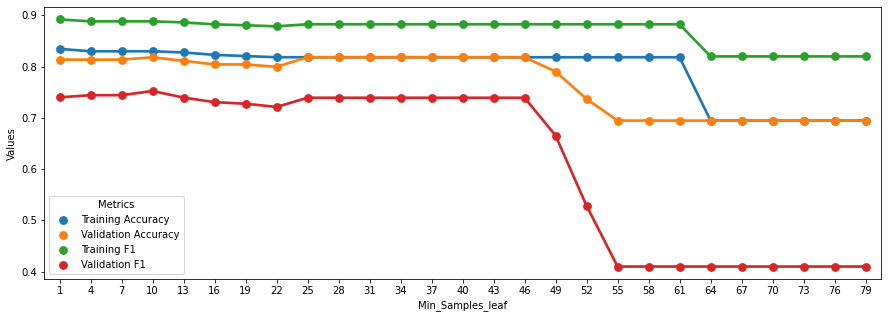

In [ ]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(x_train,y_train)
    y_training_pred = tree_clf.predict(x_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above plot, we will choose Min_Samples_leaf to 35 to improve test accuracy.

Let's use this Decision Tree classifier on unseen test data and evaluate **Test Accuracy, F1 Score** and **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(x_train,y_train)
y_pred = tree_clf.predict(x_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
yp=y_test.values.flatten()
pd.crosstab(yp, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7891891891891892
Test F1 Score:  0.8621908127208482
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,24,37,61
1,2,122,124
All,26,159,185


**Mis-classifications**

It can be seen that majority of the misclassifications are happening because of Loan Reject applicants being classified as Accept.

Let's look into Random Forest Classifier if it can reduce mis-classifications

**Model 2: Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,x_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,x_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8838612368024132
Train Accuracy  0.8205128205128205
Validation Mean F1 Score:  0.7391515286252128
Validation Mean Accuracy:  0.818139534883721


**Random Forest: Test Data Evaluation**

In [ ]:
y_pred = rf_clf.predict(x_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
yp=y_test.values.flatten()
pd.crosstab(yp, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7837837837837838
Test F1 Score:  0.8581560283687943
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,24,37,61
1,3,121,124
All,27,158,185


Random Forest gives same results as Decision Tree Classifier. We will try Logistic Regression Model by sweeping threshold values.

**Model 3: Logistic Regression**

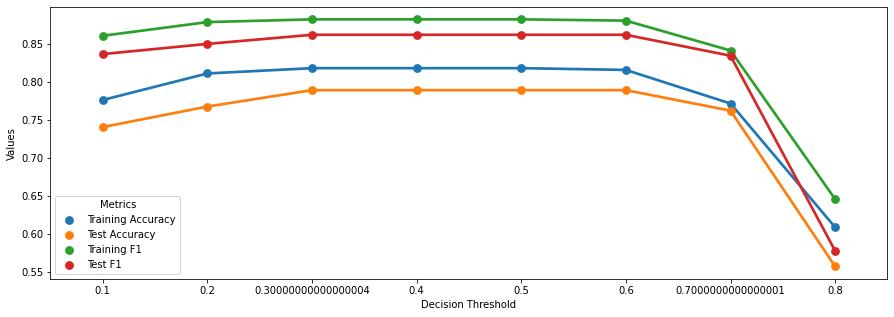

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(x_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(x_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(x_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

Logistic Regression does slightly better than Decision Tree and Random Forest. Based on the above Test/Train curves, we can keep threshold to 0.4.

Now Finally let's look at Logistic Regression Confusion Matrix

In [ ]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(x_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
yp=y_test.values.flatten()
pd.crosstab(yp, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7891891891891892
Test F1 Score:  0.8621908127208482
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,24,37,61
1,2,122,124
All,26,159,185


Logistic Regression Confusion matrix is very similar to Decision Tree and Random Forest Classifier.

Now we will try Gaussian Naive Bayes classifier.

**Model 4: Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_train)
print("Train F1 Score",f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))
print("Validation Mean F1 Score: ",cross_val_score(gnb,x_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(gnb,x_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score 0.8770864946889226
Train Accuracy  0.8111888111888111
Validation Mean F1 Score:  0.739812834384112
Validation Mean Accuracy:  0.8134336525307798


**Gaussian Naive Bayes: Test Data Evaluation**

In [ ]:
y_pred = gnb.predict(x_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
yp=y_test.values.flatten()
pd.crosstab(yp, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7891891891891892
Test F1 Score:  0.8612099644128115
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,25,36,61
1,3,121,124
All,28,157,185


Gaussian Naive Bayes classifier also gave the similar results.

Now, we will try KNN - K- Nearest Neighbors Classifier.

**Model 5 : KNN - K Nearest Neighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(knn,x_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(knn,x_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8694362017804154
Train Accuracy  0.7948717948717948
Validation Mean F1 Score:  0.6560223240441789
Validation Mean Accuracy:  0.7762243502051984


**KNN - K Nearest Neighbors : Test Data Evaluation**

In [ ]:
y_pred = knn.predict(x_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
yp=y_test.values.flatten()
pd.crosstab(yp, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.745945945945946
Test F1 Score:  0.8384879725085911
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,16,45,61
1,2,122,124
All,18,167,185


So, KNN has even worse results.

Now, we will try SVM.

**Model 6 : SVM**

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.01, C = 100)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(svc,x_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(svc,x_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8825301204819278
Train Accuracy  0.8181818181818182
Validation Mean F1 Score:  0.7391515286252128
Validation Mean Accuracy:  0.818139534883721


**SVM : Test Data Evaluation**

In [ ]:
y_pred = svc.predict(x_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
yp=y_test.values.flatten()
pd.crosstab(yp, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7891891891891892
Test F1 Score:  0.8621908127208482
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,24,37,61
1,2,122,124
All,26,159,185


**k fold cross_validation**

This algorithm splits the data into k sets and then makes k fits using every set k-1 times as training and one time as test data.

It leads to a better estimate for out of sample data than simple train test split.

In [ ]:
from sklearn.model_selection import cross_val_score

1. For decision tree classifier:

In [ ]:
scores_dtree_2 = cross_val_score(tree_clf, x_train, y_train, cv=10, scoring='accuracy')
print(scores_dtree_2)
print(scores_dtree_2.mean())

[0.76744186 0.88372093 0.8372093  0.8372093  0.79069767 0.81395349
 0.88372093 0.79069767 0.76744186 0.80952381]
0.8181616832779623


2. For Random Forest Classifier:

In [ ]:
scores_rfc1 = cross_val_score(rf_clf, x_train, y_train, cv=10, scoring='accuracy')
print(scores_rfc1)
print(scores_rfc1.mean())

[0.76744186 0.88372093 0.8372093  0.81395349 0.79069767 0.81395349
 0.88372093 0.79069767 0.76744186 0.80952381]
0.8158361018826135


3. For Logistic Regression:

In [ ]:
scores_rfc2 = cross_val_score(logreg_clf, x_train, y_train, cv=10, scoring='accuracy')
print(scores_rfc2)
print(scores_rfc2.mean())

[0.76744186 0.88372093 0.8372093  0.8372093  0.79069767 0.81395349
 0.88372093 0.79069767 0.74418605 0.80952381]
0.8158361018826135


4. For Gaussian Naive Bayes:

In [ ]:
scores_rfc3 = cross_val_score(gnb, x_train, y_train, cv=10, scoring='accuracy')
print(scores_rfc3)
print(scores_rfc3.mean())

[0.76744186 0.88372093 0.81395349 0.8372093  0.79069767 0.81395349
 0.88372093 0.79069767 0.74418605 0.76190476]
0.8087486157253597


5. For K Nearest Neighbour:

In [ ]:
scores_rfc4 = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
print(scores_rfc4)
print(scores_rfc4.mean())

[0.74418605 0.8372093  0.81395349 0.81395349 0.76744186 0.74418605
 0.79069767 0.79069767 0.72093023 0.80952381]
0.7832779623477297


6. For SVM:

In [ ]:
scores_rfc5 = cross_val_score(svc, x_train, y_train, cv=10, scoring='accuracy')
print(scores_rfc5)
print(scores_rfc5.mean())

[0.76744186 0.88372093 0.8372093  0.8372093  0.79069767 0.81395349
 0.88372093 0.79069767 0.76744186 0.80952381]
0.8181616832779623


#Conclusion
**The Classifiers with best performance are Decision Tree, Random Forest, Logistic Regression and SVM.**

In [ ]:
print("Decision tree :         ",scores_dtree_2.mean())
print("Random Forest :         ",scores_rfc1.mean())
print("Logistic Regression :   ",scores_rfc2.mean())
print("Gaussian Naive Bayes :  ",scores_rfc3.mean())
print("K Nearest Neighbors :   ",scores_rfc4.mean())
print("SVM :                   ",scores_rfc5.mean())

Decision tree :          0.8181616832779623
Random Forest :          0.8158361018826135
Logistic Regression :    0.8158361018826135
Gaussian Naive Bayes :   0.8087486157253597
K Nearest Neighbors :    0.7832779623477297
SVM :                    0.8181616832779623


#Shap

In [ ]:
#Install non-standard packages
!pip install shap
!pip install lime
!pip install eli5

#Important Features

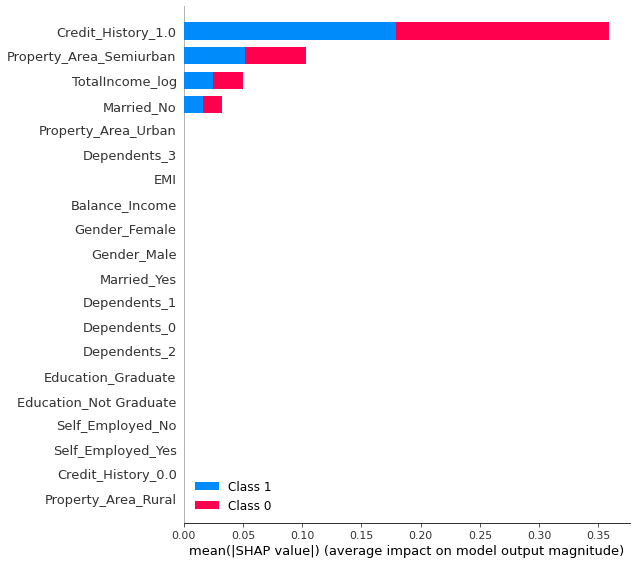

In [ ]:
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

Figure: SHAP feature importance measured as the mean absolute Shapley values. The credit_history_0 was the most important feature, changing the predicted absolute loan approval probability on average by 37% percentage points (0.37 on x-axis)

#Case 1:

**When the actual loan status is "No" and our model predicts "No"**

In [ ]:
feature_names = [i for i in train.columns if train[i].dtype in [np.int64, np.int64]]
X = train[feature_names]
row_to_show = 5
data_for_prediction = x_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
tree_clf.predict_proba(data_for_prediction_array)
import shap  
explainer = shap.TreeExplainer(tree_clf)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)


In [ ]:
print(y_test.iloc[row_to_show])
print(y_pred[row_to_show])

Loan_Status    0
Name: 293, dtype: int64
0



Row 5 has no credit history which is the biggest factor in decreasing its probablity of loan approval.

We predicted 0.08, whereas the base_value is 0.6946. Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue. The biggest impact comes from Credit_History_1.0 being 0.

If we subtract the length of the blue bars from the length of the pink bars, it equals the distance from the base value to the output.

#Case 2:

**When the actual loan status is "Yes" and our model predicts "Yes"**

In [ ]:
feature_names = [i for i in train.columns if train[i].dtype in [np.int64, np.int64]]
X = train[feature_names]
row_to_show = 2
data_for_prediction = x_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
tree_clf.predict_proba(data_for_prediction_array)
import shap  
explainer = shap.TreeExplainer(tree_clf)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
print(y_test.iloc[row_to_show])
print(y_pred[row_to_show])

Loan_Status    1
Name: 41, dtype: int64
1


#Case 3:
a)
**Where actual loan status is "Yes" but our model predicts "No".**

In [ ]:
feature_names = [i for i in train.columns if train[i].dtype in [np.int64, np.int64]]
X = train[feature_names]
row_to_show = 29
data_for_prediction = x_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
tree_clf.predict_proba(data_for_prediction_array)
import shap  
explainer = shap.TreeExplainer(tree_clf)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
print(y_test.iloc[row_to_show])
print(y_pred[row_to_show])

Loan_Status    0
Name: 518, dtype: int64
1


#Case 3:
b) **Where actual loan status is "Yes" but our model predicts "No".**

In [ ]:
feature_names = [i for i in train.columns if train[i].dtype in [np.int64, np.int64]]
X = train[feature_names]
row_to_show = 27
data_for_prediction = x_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
tree_clf.predict_proba(data_for_prediction_array)
import shap  
explainer = shap.TreeExplainer(tree_clf)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
print(y_test.iloc[27])
print(y_pred[27])

Loan_Status    1
Name: 201, dtype: int64
0


#Case 4:
a)
**Where actual loan status is "No" but our model predicts "Yes".**

In [ ]:
feature_names = [i for i in train.columns if train[i].dtype in [np.int64, np.int64]]
X = train[feature_names]
row_to_show = 23
data_for_prediction = x_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
tree_clf.predict_proba(data_for_prediction_array)
import shap  
explainer = shap.TreeExplainer(tree_clf)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
print(y_test.iloc[23])
print(y_pred[23])

Loan_Status    0
Name: 135, dtype: int64
1


#Case 4:
b) **Where actual loan status is "No" but our model predicts "Yes".**

In [ ]:
feature_names = [i for i in train.columns if train[i].dtype in [np.int64, np.int64]]
X = train[feature_names]
row_to_show = 3
data_for_prediction = x_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
tree_clf.predict_proba(data_for_prediction_array)
import shap  
explainer = shap.TreeExplainer(tree_clf)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
print(y_test.iloc[3])
print(y_pred[3])
print("Average TotalIncome_log :")
l=(test["TotalIncome_log"].sum())/(test['TotalIncome_log'].count())
l


Loan_Status    0
Name: 148, dtype: int64
1
Average TotalIncome_log :


0.7830551161129353